## SUPPORT VECTOR CLASSIFIER IMPLEMENTATION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# lets create synthetic datapoints

In [3]:
from sklearn.datasets import make_classification
x,y= make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [4]:
x

array([[ 2.05122717, -0.07234022],
       [-1.19904179,  1.38996961],
       [-0.79321237, -0.83980828],
       ...,
       [-0.44480847, -1.73872311],
       [-1.50300193, -1.18844273],
       [-1.20940048,  1.34932695]])

<Axes: xlabel='0', ylabel='1'>

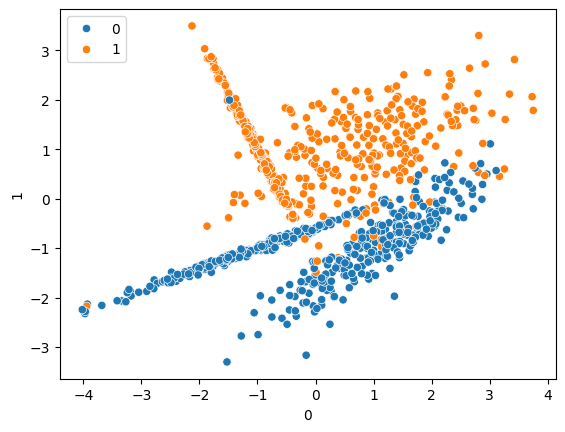

In [5]:
sns.scatterplot(x = pd.DataFrame(x)[0],y = pd.DataFrame(x)[1],hue=y)

In [6]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=10)

In [7]:
from sklearn.svm import SVC

In [8]:
svc = SVC(kernel= 'linear')
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [9]:
# prediction

y_pred = svc.predict(x_test)

In [10]:
from sklearn.metrics import classification_report,confusion_matrix

In [11]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       117
           1       0.99      0.86      0.92       133

    accuracy                           0.92       250
   macro avg       0.93      0.92      0.92       250
weighted avg       0.93      0.92      0.92       250

[[116   1]
 [ 19 114]]


In [12]:
rbf =SVC(kernel='rbf')

In [13]:
rbf.fit(x_train,y_train)

SVC()

In [14]:
y_pred1 = rbf.predict(x_test)

In [15]:
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       117
           1       0.98      0.86      0.92       133

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.93      0.92      0.92       250

[[115   2]
 [ 18 115]]


Because of the rbf kernal 
internally some transformation has happend and the accuracy of the model has been improved

In [16]:
poly = SVC(kernel='poly')
poly.fit(x_train,y_train)

# prediction
y_pred2 = poly.predict(x_test)
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       117
           1       0.89      0.89      0.89       133

    accuracy                           0.89       250
   macro avg       0.89      0.89      0.89       250
weighted avg       0.89      0.89      0.89       250

[[103  14]
 [ 14 119]]


In [17]:
from sklearn.model_selection import GridSearchCV

# defining parameter range 

param_grid = {'C':[0.1,1,10,100,1000],
              "gamma": [1,0.1,0.01,0.001,0.0001],
              'kernel' : ['rbf']}

In [18]:
grid = GridSearchCV(SVC(),param_grid=param_grid,cv=6,refit = True,verbose=3)

In [19]:
grid.fit(x_train,y_train)

Fitting 6 folds for each of 25 candidates, totalling 150 fits
[CV 1/6] END ........C=0.1, gamma=1, kernel=rbf;, score=0.944 total time=   0.0s
[CV 2/6] END ........C=0.1, gamma=1, kernel=rbf;, score=0.936 total time=   0.0s
[CV 3/6] END ........C=0.1, gamma=1, kernel=rbf;, score=0.976 total time=   0.0s
[CV 4/6] END ........C=0.1, gamma=1, kernel=rbf;, score=0.968 total time=   0.0s
[CV 5/6] END ........C=0.1, gamma=1, kernel=rbf;, score=0.952 total time=   0.0s
[CV 6/6] END ........C=0.1, gamma=1, kernel=rbf;, score=0.968 total time=   0.0s
[CV 1/6] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.944 total time=   0.0s
[CV 2/6] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.936 total time=   0.0s
[CV 3/6] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.968 total time=   0.0s
[CV 4/6] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.960 total time=   0.0s
[CV 5/6] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.952 total time=   0.0s
[CV 6/6] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(cv=6, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [20]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [21]:
y_pred4 = grid.predict(x_test)

print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       117
           1       0.98      0.86      0.92       133

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.93      0.92      0.92       250

[[115   2]
 [ 18 115]]
